In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

The Mahalanobis distance is a measure of the distance between an observation and a distribution. Is a multi-dimensional generalisation of the idea of measuring how many standard deviations is an observation away from the mean of a distribution. It takes into account the correlations in the dataset, since the distance increases as we move along the principal component axis. 

Let's first define the parameters of a multivariate normal distribution:

In [2]:
np.random.seed(0)

In [3]:
mean = np.array([2, 4])
cov = np.array([[2, 2], [2, 5]])
sample = np.random.multivariate_normal(mean, cov, 100)

Let's define two points. Both points have the same euclidean distance to the mean. However, each of them is located along a different principal axis:

In [4]:
p1 = np.array([0, 10])
p2 = np.array([5, 9.5678])

print('Euclidean distance between mean and p1: ' + str(np.sum(np.power(p1 - mean, 2))))
print('Euclidean distance between mean and p2: ' + str(np.sum(np.power(p2 - mean, 2))))

Euclidean distance between mean and p1: 40
Euclidean distance between mean and p2: 40.00039684


However, their Mahalanobis distance to the distribution is different:

In [5]:
def mahalanobis(p, mean, cov):
    dif = p - mean
    return math.sqrt(np.dot(np.dot(dif.T, np.linalg.inv(cov)), dif))

print('Mahalanobis distance for p1: ' + str(mahalanobis(p1, mean, cov)))
print('Mahalanobis distance for p2: ' + str(mahalanobis(p2, mean, cov)))

Mahalanobis distance for p1: 4.83045891539648
Mahalanobis distance for p2: 2.58802349551416


And the reason for that is that these points are located along the two different main axes of the distribution:

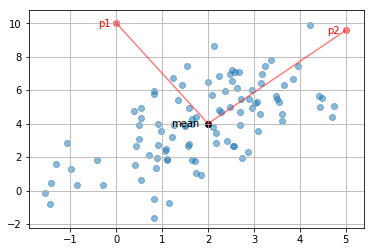

In [6]:
fig, ax = plt.subplots()
ax.scatter(sample[:, 0], sample[:, 1], alpha = 0.5)
ax.scatter(p1[0], p1[1], color = 'r', alpha = 0.5)
ax.scatter(p2[0], p2[1], color = 'r', alpha = 0.5)
ax.scatter(mean[0], mean[1], color = 'k')
ax.plot([p1[0], mean[0]], [p1[1], mean[1]], color = 'r', alpha = 0.5)
ax.plot([p2[0], mean[0]], [p2[1], mean[1]], color = 'r', alpha = 0.5)
ax.text(p1[0] - 0.4, p1[1] - 0.2, 'p1', color = 'r')
ax.text(p2[0] - 0.4, p2[1] - 0.2, 'p2', color = 'r')
ax.text(mean[0] - 0.8, mean[1] - 0.2, 'mean', color = 'k')
plt.grid(True)